In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv('house_data.csv')

In [14]:
print(df.head())


   build_year        lat  living_area      long    municipality_name  zipcode  \
0        1990  47.009808        110.0  8.483789              Vitznau     6354   
1        2017  46.872177        120.0  9.880183     Klosters-Serneus     7250   
2        2010  46.519173        107.0  6.525882          Préverenges     1028   
3        2018  47.521343        103.0  8.536971               Bülach     8180   
4        2007  46.510216         95.0  9.852427  Celerina/Schlarigna     7505   

   num_rooms object_type_name     price  water_percentage_1000  \
0        3.0          Wohnung  815000.0               0.400565   
1        3.0          Wohnung  890000.0               0.008272   
2        4.0          Wohnung  870000.0               0.140534   
3        3.0          Wohnung  829000.0               0.003954   
4        3.0          Wohnung  865000.0               0.011116   

   travel_time_private_transport  travel_time_public_transport  \
0                           35.0                  

In [15]:
print(df.describe())

         build_year           lat   living_area          long       zipcode  \
count  22570.000000  22570.000000  22570.000000  22570.000000  22570.000000   
mean    1980.037794     47.115347    154.444802      8.242356   5843.185113   
std       61.956276      0.432066     99.195031      0.784873   2383.674258   
min        1.000000     45.879650     17.000000      5.992815   1000.000000   
25%     1972.000000     46.872154    108.000000      7.619938   4104.000000   
50%     1992.000000     47.258255    138.000000      8.274453   5722.000000   
75%     2011.000000     47.441005    176.000000      8.789540   8227.500000   
max     2108.000000     47.793530   1999.000000     10.459287   9658.000000   

          num_rooms         price  water_percentage_1000  \
count  22570.000000  2.257000e+04           22570.000000   
mean       4.968937  9.605681e+05               0.035906   
std        1.936707  5.428610e+05               0.081487   
min        0.000000  2.050000e+05               

In [16]:
print(df.isnull().sum())

build_year                                  0
lat                                         0
living_area                                 0
long                                        0
municipality_name                           0
zipcode                                     0
num_rooms                                   0
object_type_name                            0
price                                       0
water_percentage_1000                       0
travel_time_private_transport               0
travel_time_public_transport                0
number_of_buildings_in_hectare              0
number_of_apartments_in_hectare             0
number_of_workplaces_in_hectare             0
number_of_workplaces_sector_1_in_hectare    0
number_of_workplaces_sector_2_in_hectare    0
number_of_workplaces_sector_3_in_hectare    0
population_in_hectare                       0
dtype: int64


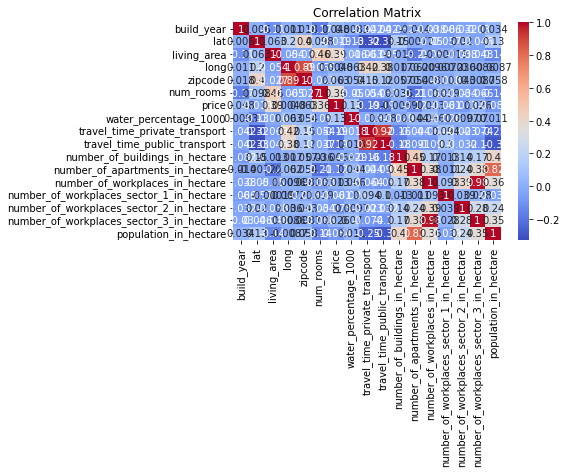

In [17]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [28]:
X = df[['build_year','lat','living_area','long','num_rooms','price','water_percentage_1000','travel_time_private_transport','travel_time_public_transport','number_of_buildings_in_hectare','number_of_apartments_in_hectare','number_of_workplaces_in_hectare','number_of_workplaces_sector_1_in_hectare','number_of_workplaces_sector_2_in_hectare','number_of_workplaces_sector_3_in_hectare','population_in_hectare']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.6122273250072326e-20
R-squared: 1.0


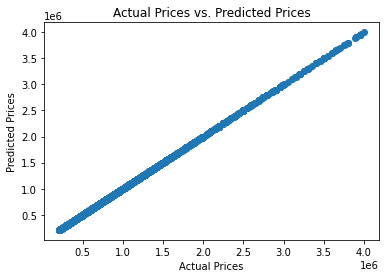

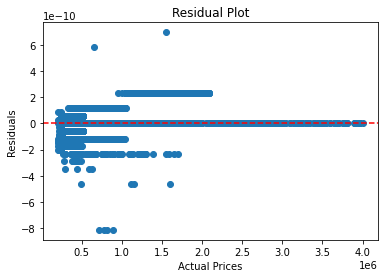

Predicted Price: 8899999.999999994


In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
new_data = [[2024, 90.97432709, 120, 88.49748659, 4, 8900000, 0, 6, 84, 9, 18,17,0,0,19,126]]
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])